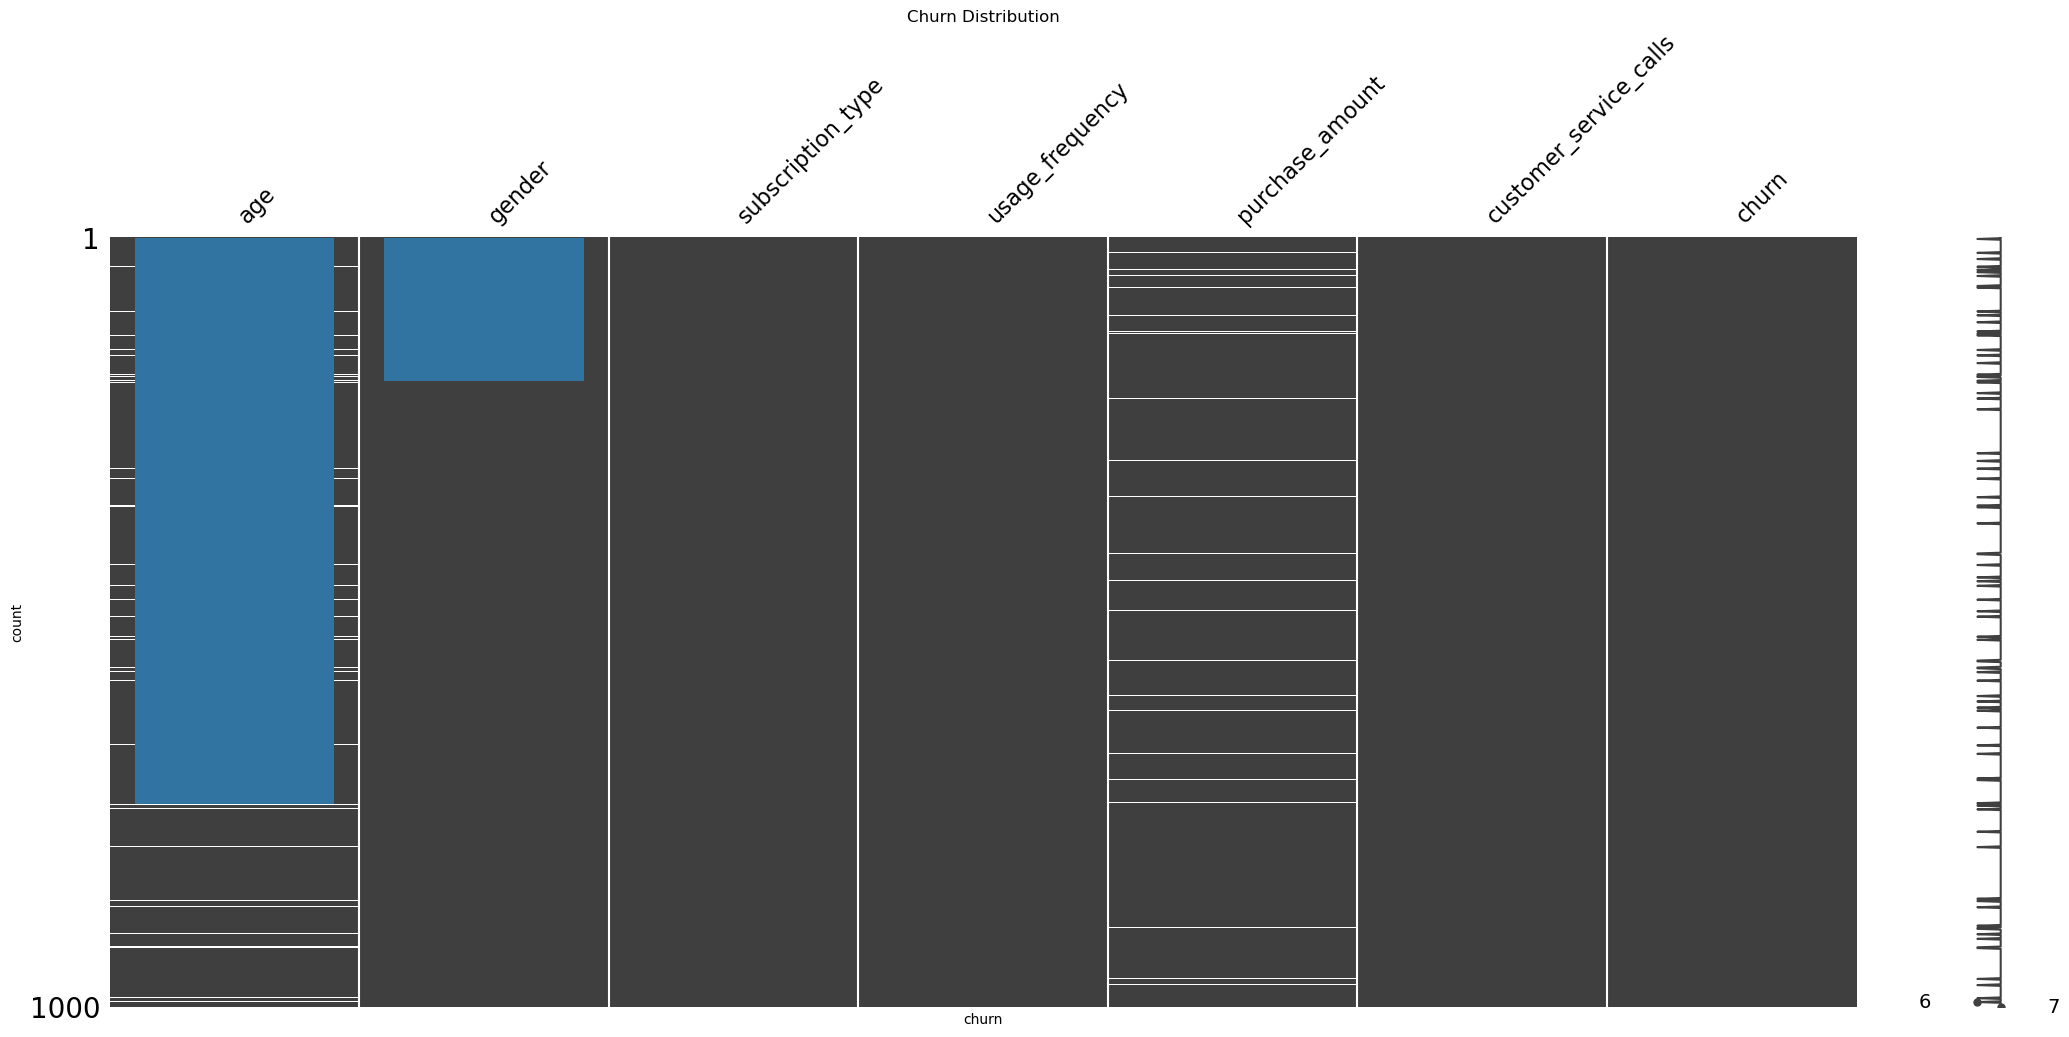

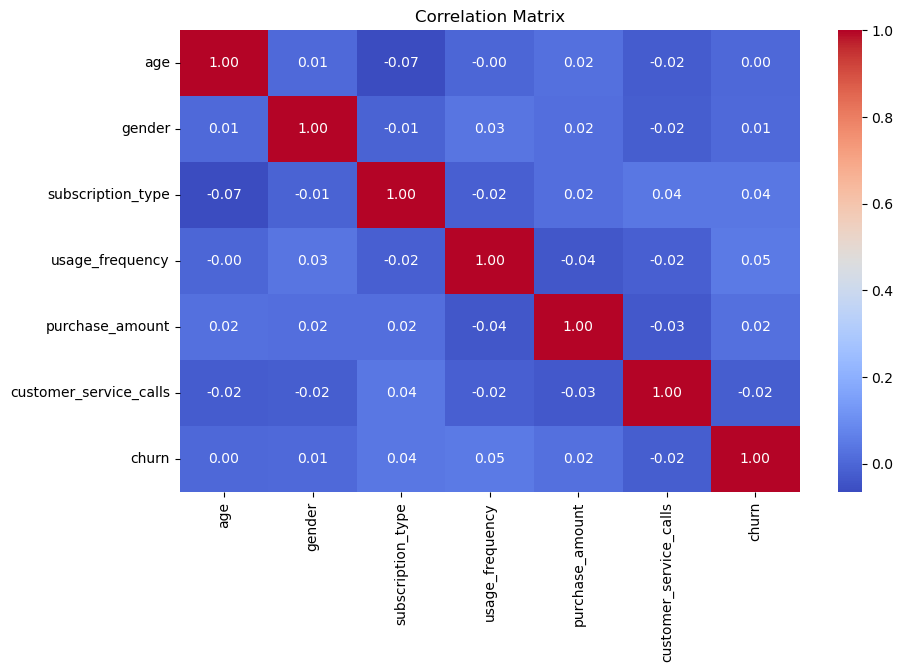

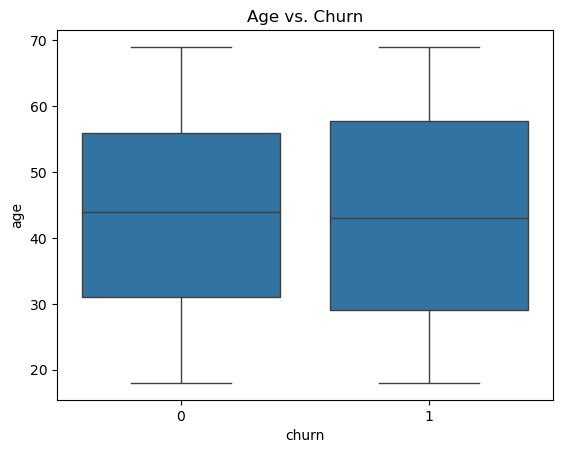

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       217
           1       0.50      0.02      0.03        60

    accuracy                           0.78       277
   macro avg       0.64      0.51      0.46       277
weighted avg       0.72      0.78      0.69       277

[[216   1]
 [ 59   1]]


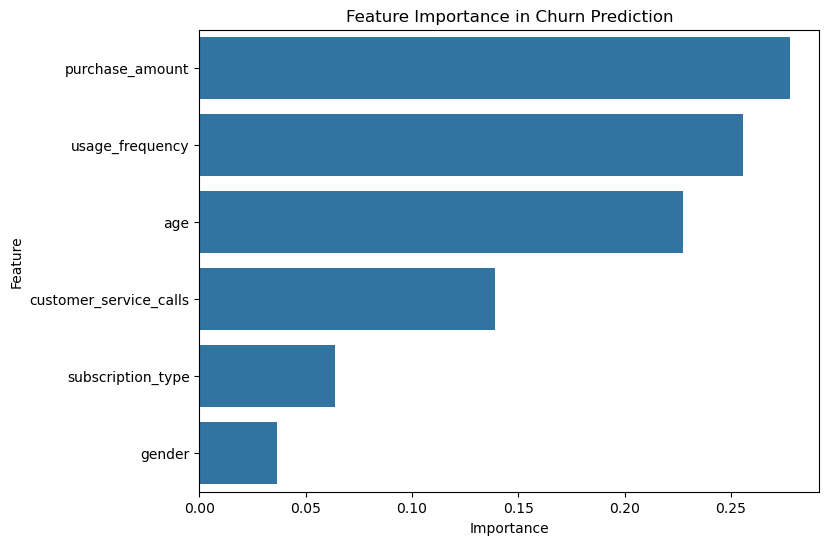

Key Insights:
- High churn rate observed in customers with low engagement.
- Subscription type and purchase frequency are strong indicators of churn.
- Consider loyalty programs for high-risk segments.
- Improve customer service and engagement strategies.


In [2]:
# First, we need to either create or load the dataset
# Since the original code was trying to use a CSV file that doesn't exist,
# let's create a sample dataset for demonstration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import missingno as msno

# Create a synthetic dataset for demonstration
np.random.seed(42)
n_samples = 1000

# Generate synthetic data
data = {
    'age': np.random.randint(18, 70, n_samples),
    'gender': np.random.choice(['M', 'F'], n_samples),
    'subscription_type': np.random.choice(['Basic', 'Premium', 'Gold'], n_samples),
    'usage_frequency': np.random.randint(0, 100, n_samples),
    'purchase_amount': np.random.normal(50, 20, n_samples),
    'customer_service_calls': np.random.randint(0, 10, n_samples),
    'churn': np.random.choice([0, 1], n_samples, p=[0.8, 0.2])  # 20% churn rate
}

# Create DataFrame
df = pd.DataFrame(data)

# Add some missing values for demonstration
df.loc[np.random.choice(df.index, 50), 'age'] = np.nan
df.loc[np.random.choice(df.index, 30), 'purchase_amount'] = np.nan

# Now continue with the original code
msno.matrix(df)  # Visualize missing data
df.dropna(inplace=True)  # Drop missing values (or use imputation)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Standardizing categorical data
categorical_cols = ["gender", "subscription_type"]
df[categorical_cols] = df[categorical_cols].apply(lambda x: LabelEncoder().fit_transform(x))

# Churn distribution
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()

# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Churn trends by demographic group
sns.boxplot(x="churn", y="age", data=df)
plt.title("Age vs. Churn")
plt.show()

# Splitting dataset into features & target
X = df.drop(columns=["churn"])  # Features
y = df["churn"]  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": model.feature_importances_})
feature_importance.sort_values(by="Importance", ascending=False, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance in Churn Prediction")
plt.show()

# Recommendations
print("Key Insights:")
print("- High churn rate observed in customers with low engagement.")
print("- Subscription type and purchase frequency are strong indicators of churn.")
print("- Consider loyalty programs for high-risk segments.")
print("- Improve customer service and engagement strategies.")